# Import libraries

In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
# load dataset

data = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [3]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# no.of rows and columns

data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
data['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
len(data['v1'].unique())

2

In [9]:
len(data['v2'].unique())

5169

In [10]:
# Data cleaning

In [11]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
len(data['Unnamed: 2'].unique())

44

In [13]:
# 2   Unnamed: 2  50 non-null     object
# 3   Unnamed: 3  12 non-null     object
# 4   Unnamed: 4  6 non-null      object

In [14]:
# drop above 3 columns

data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [15]:
data.sample()

,v1,v2
1609,ham,You all ready for * big day tomorrow?


In [16]:
data.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [17]:
data.sample()

,target,text
305,ham,Yup... From what i remb... I think should be c...


In [18]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
# converting target column into numbers

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
data['target'] = encoder.fit_transform(data['target'])

In [21]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
# check for duplicate values

data.duplicated().sum()

403

In [24]:
# remove duplicate values

data = data.drop_duplicates()

In [25]:
data.duplicated().sum()

0

In [26]:
# shape changed 

data.shape

(5169, 2)

# 

# Exploratory Data Analysis

In [27]:
data.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [29]:
import matplotlib.pyplot as plt

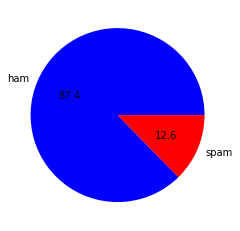

In [30]:
plt.pie(data['target'].value_counts(), colors={'red','blue'},labels=['ham','spam'],autopct="%0.1f")
plt.show()
# shown below- spam are very less/barely than ham

In [31]:
# data is imbalanced

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# counting number of characters in the text

data['num_characters'] = data['text'].apply(len)

In [35]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
data['num_words'] = data['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [37]:
data.head(2)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [38]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [39]:
data['num_sentences'].head(3)

0    2
1    2
2    2
Name: num_sentences, dtype: int64

In [40]:
data.head(2)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [41]:
data.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [42]:
# describe for spam messages

data[data['target'] == 0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [43]:
import seaborn as sns

In [44]:
data[data['target'] == 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

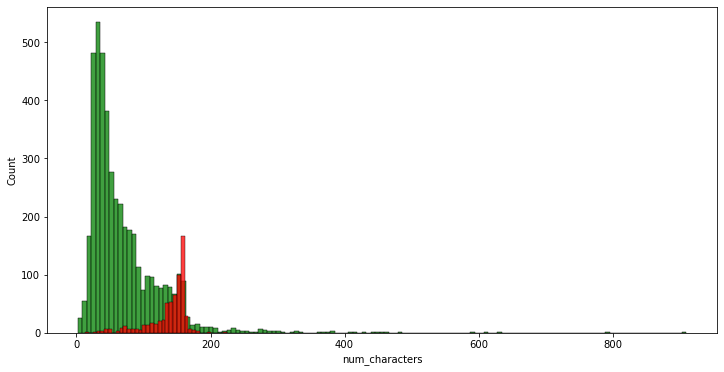

In [45]:
plt.figure(figsize = (12,6))
sns.histplot(data[data['target'] == 0]['num_characters'], color = 'green')
sns.histplot(data[data['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

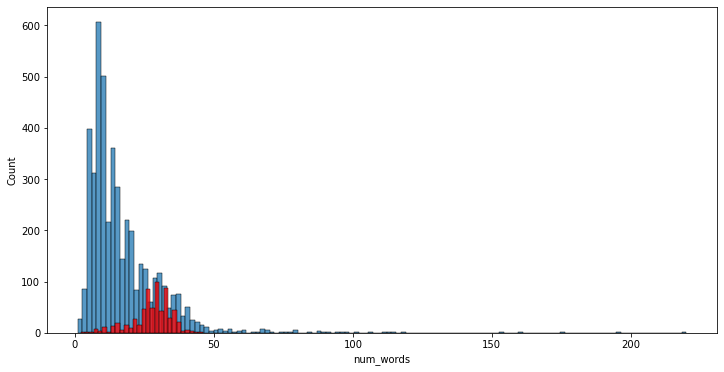

In [46]:
plt.figure(figsize = (12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

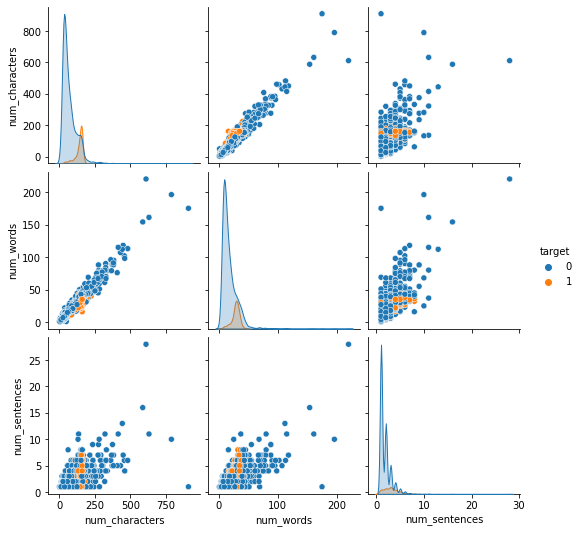

In [47]:
sns.pairplot(data,hue='target')

In [48]:
data.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

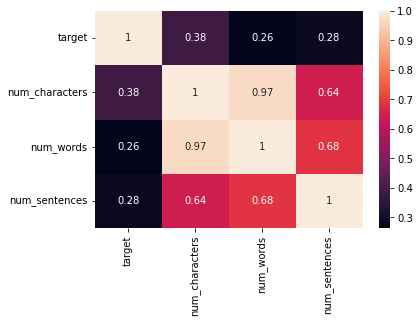

In [49]:
sns.heatmap(data.corr(),annot =True)

# 

# Data Preprocessing

In [50]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [51]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [52]:
# single function to perform above all operations

import nltk
nltk.download('stopwords')

#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation


def transform_text(text):
    text = text.lower()                # lower case
    text = nltk.word_tokenize(text)    # tokenization
    #text = [''.join(e for e in string if e.isalnum()) for string in text]
    #text = [x for x in text if x]
    
    y = []
    for i in text:
        if i.isalnum():     # 3.removing special chars
            y.append(i)
            
    text = y[:]    #list is immutable so did cloning
    y.clear()
    
    # removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
transform_text('SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info')

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [54]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [55]:
data['transformed_text'] = data['text'].apply(transform_text)

In [56]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [58]:
from wordcloud import WordCloud
wc = WordCloud(width = 700,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = " "))

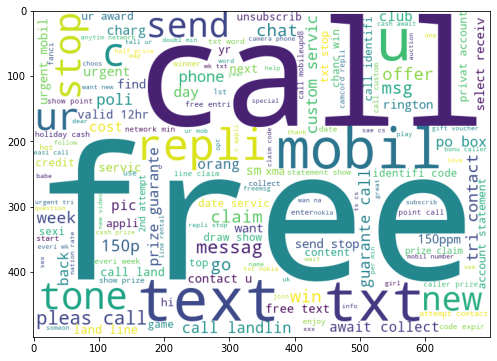

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

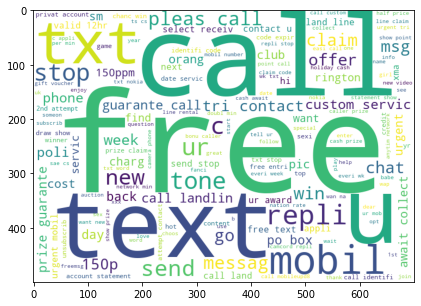

In [61]:
wc = WordCloud(width = 700,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

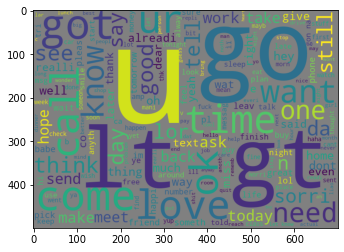

In [62]:
wc = WordCloud(width = 700,height=500,min_font_size=3,background_color='gray')
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,4))
plt.imshow(ham_wc)

In [63]:
data.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [64]:
data[data['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [65]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

9939

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


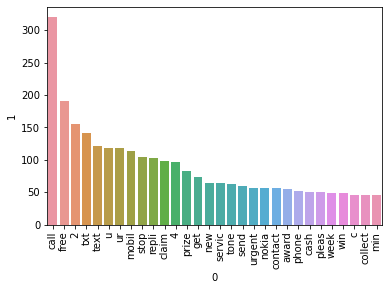

In [67]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)

35394

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


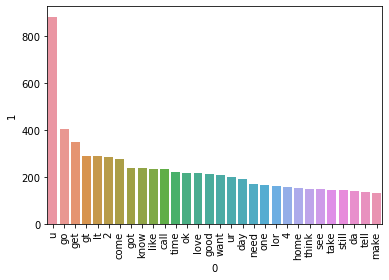

In [70]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
# Text Vectorization
# using Bag of Words
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 

# Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [74]:
X.shape

(5169, 3000)

In [75]:
y = data['target'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [81]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [82]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred3))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred3))
print("Precision Score",precision_score(y_test,y_pred3))

Accuracy Score 0.9835589941972921
Confusion Matrix
 [[895   1]
 [ 16 122]]
Precision Score 0.991869918699187


In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb+'))
pickle.dump(mnb,open('model.pkl','wb+'))